# Netflix movies and TV shows EDA

## About Data

Show_ID-Id of the movie/TV show

type-Movie or TV show

title-Title of the movie/TV show

director-Director of the movie/TV show

Cast-actors/actress who have acted in the movie/TV show

country-Country the movie/TV show belongs to

date_added-Aired dated-Released date on netflix

release year-Original movie/TV show release date

rating-Rating of the movie/TV show

duration-Length of the movie

genre-Genre of the movie

Description-Summary of the movie

## Workflow
* Understanding of data
* Data cleaning
* Exploratory Data Analysis
* Insights

### Reading and understanding of the data

<font size='3'> Importing libraries, setting Seaborn graphs view and reading the data </font>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set(                          # .set - customing default plot
    font_scale=1,                 # Font size
    style = 'whitegrid',          # Graphic view
    rc={'figure.figsize':(20,7)}  # Size of the graphic
)

In [4]:
netflix = pd.read_csv('/Users/sofagogoleva/Data_Analytics/NetFlix.csv')

In [58]:
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,2019-01-05,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,2016-03-01,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,2018-12-03,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s995,TV Show,Blown Away,NaN,NaN,Canada,2019-07-12,2019,TV-14,1,"International TV Shows, Reality TV",Ten master artists turn up the heat in glassbl...
7783,s996,TV Show,Blue Exorcist,NaN,"Nobuhiko Okamoto, Jun Fukuyama, Kana Hanazawa,...",Japan,2020-09-01,2017,TV-MA,2,"Anime Series, International TV Shows",Determined to throw off the curse of being Sat...
7784,s997,Movie,Blue Is the Warmest Color,Abdellatif Kechiche,"Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...","France, Belgium, Spain",2016-08-26,2013,NC-17,180,"Dramas, Independent Movies, International Movies","Determined to fall in love, 15-year-old Adele ..."
7785,s998,Movie,Blue Jasmine,Woody Allen,"Cate Blanchett, Sally Hawkins, Alec Baldwin, L...",United States,2019-03-08,2013,PG-13,98,"Comedies, Dramas, Independent Movies",The high life leads to high anxiety for a fash...


In [8]:
netflix.shape # Dataframe size

(7787, 12)

In [111]:
netflix.columns # Dataframe columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'description',
       'delta_release_vs_adding'],
      dtype='object')

In [12]:
netflix.dtypes # Dataframe data types

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration         int64
genres          object
description     object
dtype: object

In [6]:
netflix.isna().sum() # Calculating number of NaN values

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
genres             0
description        0
dtype: int64

In [20]:
netflix.rating.unique() # Rating column unique values

array(['TV-MA', 'TV-PG', 'R', 'TV-G', 'PG-13', 'TV-14', 'TV-Y', 'PG',
       'TV-Y7', 'NR', 'G', 'TV-Y7-FV', nan, 'UR', 'NC-17'], dtype=object)

<font size='3'> Getting unique genres in order to sort mvoies and TV shows by unique genre </font>

*<font size='2.5'> After first code run, few dublicates were found. After inspection, it came up that some words were ended with comma. Added additional condition to avoid dublicates. List len dropped from 53 values to 43 </font>*

In [358]:
genre_list = netflix.genres.to_list()
unique_genre = []
for i in range(len(genre_list)):
    temp = genre_list[i].split()
    for q in range(len(temp)):
        if temp[q].endswith(','):
            temp[q].replace(',', '')
        elif temp[q] not in unique_genre:
            unique_genre.append(temp[q])
    
print(unique_genre, '\n', 'Count of unique genres:', len(unique_genre))

['International', 'TV', 'Sci-Fi', '&', 'Fantasy', 'Horror', 'Thrillers', 'Sports', 'Movies', 'Comedies', 'British', 'Science', 'Nature', 'Independent', 'Action', 'Romantic', 'Documentaries', 'Anime', 'Shows', 'Music', 'Musicals', 'Stand-Up', 'Comedy', "Kids'", 'Children', 'Family', 'Classic', 'Docuseries', 'Faith', 'Spirituality', 'Spanish-Language', 'Dramas', 'Reality', 'Crime', 'Adventure', 'Korean', 'LGBTQ', 'Talk', 'Teen', 'Cult', 'Features', 'Mysteries', 'Series'] 
 Count of unique genres: 43


### Data cleaning

In [14]:
netflix['date_added'] = pd.to_datetime(netflix.date_added) # Changing data type for date_added column

In [112]:
netflix['date_added'].dtype # Confirming changes

dtype('<M8[ns]')

In [127]:
netflix.date_added.fillna(netflix.date_added.median(), inplace=True) # Filling NaN date values to median value

In [129]:
netflix.date_added.isna().sum() # Confirming changes

0

In [307]:
netflix['year'] = netflix.date_added.dt.year            # Adding year column to dataframe
netflix['month'] = netflix.date_added.dt.month_name()   # Adding month column to dataframe
netflix['day'] = netflix.date_added.dt.day_name()       # Adding day column to dataframe

In [338]:
# Making categorical values for month column. To have convenient months order
mo = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
netflix['month'] = pd.Categorical(netflix.month, categories=mo, ordered=True)

In [218]:
# Making categorical values for day column. To have convenient weekdays order
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
netflix['day'] = pd.Categorical(netflix.day, categories=weekday, ordered=True)

In [214]:
netflix.dtypes # Confirming changes

type                               object
title                              object
director                           object
country                            object
date_added                 datetime64[ns]
release_year                        int64
rating                             object
duration                            int64
genres                             object
description                        object
delta_release_vs_adding             int64
month                            category
day                              category
dtype: object

<font size='3'> Dropping show_id and cast columns due to uselessness for this project </font>

In [133]:
netflix.drop(columns=['show_id', 'cast'], inplace=True)

<font size='3'> Replacing NaN values in netflix dataframe </font>

In [157]:
netflix.query('rating.isnull() == True') # Filtering dataframe with NaN rating values

,type,title,director,country,date_added,release_year,rating,duration,genres,description,delta_release_vs_adding,month,day
1513,TV Show,Gargantia on the Verdurous Planet,NaN,Japan,2016-12-01,2013,NaN,1,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel...",3.0,December,Thursday
2958,TV Show,Little Lunch,NaN,Australia,2018-02-01,2015,NaN,1,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take...",3.0,February,Thursday
3042,Movie,Louis C.K. 2017,Louis C.K.,United States,2017-04-04,2017,NaN,74,Movies,"Louis C.K. muses on religion, eternal love, gi...",0.0,April,Tuesday
3043,Movie,Louis C.K.: Hilarious,Louis C.K.,United States,2016-09-16,2010,NaN,84,Movies,Emmy-winning comedy writer Louis C.K. brings h...,6.0,September,Friday
3044,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,United States,2016-08-15,2015,NaN,66,Movies,The comic puts his trademark hilarious/thought...,1.0,August,Monday
3695,Movie,My Honor Was Loyalty,Alessandro Pepe,Italy,2017-03-01,2015,NaN,115,Dramas,"Amid the chaos and horror of World War II, a c...",2.0,March,Wednesday
6444,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,NaN,2017-01-26,2017,NaN,37,Movies,Oprah Winfrey sits down with director Ava DuVe...,0.0,January,Thursday


In [177]:
# Setting rating for kids and anime show
a = [1513, 2958]
for i in a:
    netflix['rating'].iloc[i] = 'TV-14'

/var/folders/5r/f4s91dtn26d9p7wx3705nv6m0000gn/T/ipykernel_38064/944629783.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix['rating'].iloc[i] = 'TV-14'


In [175]:
# Setting rating for movies 18+
b = [3042, 3043, 3044, 3695, 6444]
for q in b:
    netflix['rating'].iloc[q] = 'TV-MA'

/var/folders/5r/f4s91dtn26d9p7wx3705nv6m0000gn/T/ipykernel_38064/646111163.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix['rating'].iloc[q] = 'TV-MA'


In [179]:
netflix.rating.isnull().sum() # Confirming changes

0

In [180]:
netflix.country.fillna('Missing', inplace=True) # Filling NaN values for country column

In [181]:
netflix.director.fillna('Absent', inplace=True) # Filling NaN values for director column

In [184]:
netflix.isna().sum() # Confirming changes

type                       0
title                      0
director                   0
country                    0
date_added                 0
release_year               0
rating                     0
duration                   0
genres                     0
description                0
delta_release_vs_adding    0
month                      0
day                        0
dtype: int64

### Exploratory Data Analysis

<font size='3'> Performing basic statictical summary </font>

In [187]:
netflix.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,7787.0,2013.932580,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
duration,7787.0,69.122769,50.950743,1.0,2.0,88.0,106.0,312.0
delta_release_vs_adding,7787.0,4.561449,8.727864,-3.0,0.0,1.0,5.0,93.0


In [188]:
netflix.describe(include='object').T

,count,unique,top,freq
type,7787,2,Movie,5377
title,7787,7787,3%,1
director,7787,4050,Absent,2389
country,7787,682,United States,2555
rating,7787,14,TV-MA,2868
genres,7787,492,Documentaries,334
description,7787,7769,Multiple women report their husbands as missin...,3
month,7787,12,December,833
day,7787,7,Friday,2297


<font size='3'> Which type of content is more popular </font>

In [223]:
netflix.type.value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

*<font size='3'> Movies are more common than TV shows</font>*

<font size='1'>     </font>

<font size='3'> Dynamic of movies and TV shows releases by years </font>

In [53]:
# Creating dataframe to see the dynamic and build the lineplot
movies_by_release = netflix \
    .groupby('release_year', as_index=False) \
    .agg({'description': 'count'}) \
    .sort_values('release_year').reset_index(drop=True)

movies_by_release

,release_year,description
0,1925,1
1,1942,2
2,1943,3
3,1944,3
4,1945,3
...,...,...
68,2017,1012
69,2018,1121
70,2019,996
71,2020,868


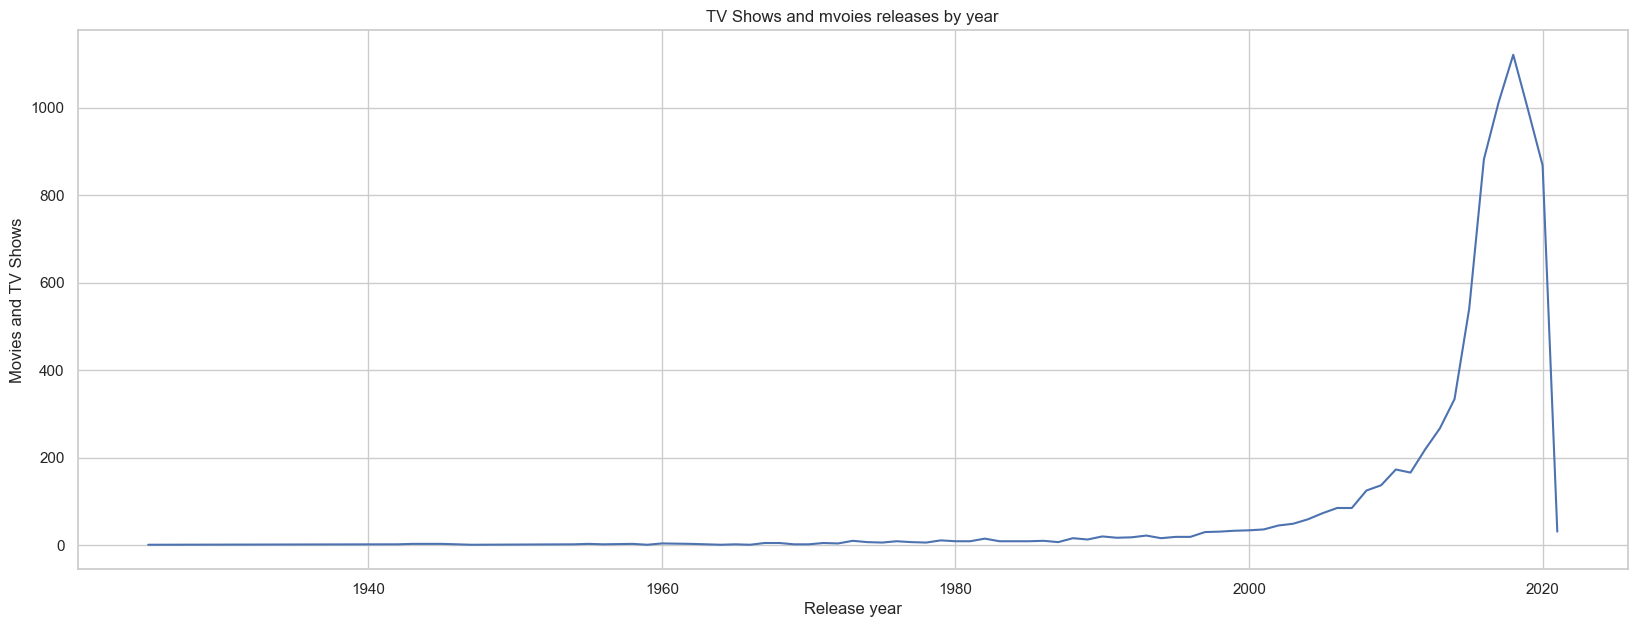

In [365]:
sns.lineplot(data=movies_by_release, x='release_year', y='description');
plt.title('TV Shows and movies releases by year');
plt.xlabel('Release year');
plt.ylabel('Movies and TV Shows');

*<font size='3'> As sees from the plot, movie industry started actively grow by end of 2000. Value drop in early 2020 is representing missing data in dataset (all data is till 2021) and COVID quarantine in 2020 that affected movie industry as well as other industries. </font>*

<font size='1'>     </font>

<font size='3'> Dynamic of movies and TV shows adding to the platfrom by years </font>

In [64]:
# Creating dataframe to see the dynamic and build the lineplot
movies_by_adding = netflix \
    .groupby('date_added', as_index=False) \
    .agg({'description': 'count'}) \
    .sort_values('date_added').reset_index(drop=True)

movies_by_adding

,date_added,description
0,2008-01-01,1
1,2008-02-04,1
2,2009-05-05,1
3,2009-11-18,1
4,2010-11-01,1
...,...,...
1507,2021-01-12,3
1508,2021-01-13,2
1509,2021-01-14,2
1510,2021-01-15,15


In [271]:
# Adding rolling mean with window of 50, to smooth the line and be able to see dynamic
movies_by_adding['rolling'] = movies_by_adding.description.rolling(50).mean().round(2)

In [368]:
movies_by_adding

,date_added,description,rolling
0,2008-01-01,1,NaN
1,2008-02-04,1,NaN
2,2009-05-05,1,NaN
3,2009-11-18,1,NaN
4,2010-11-01,1,NaN
...,...,...,...
1507,2021-01-12,3,6.50
1508,2021-01-13,2,6.32
1509,2021-01-14,2,6.20
1510,2021-01-15,15,6.46


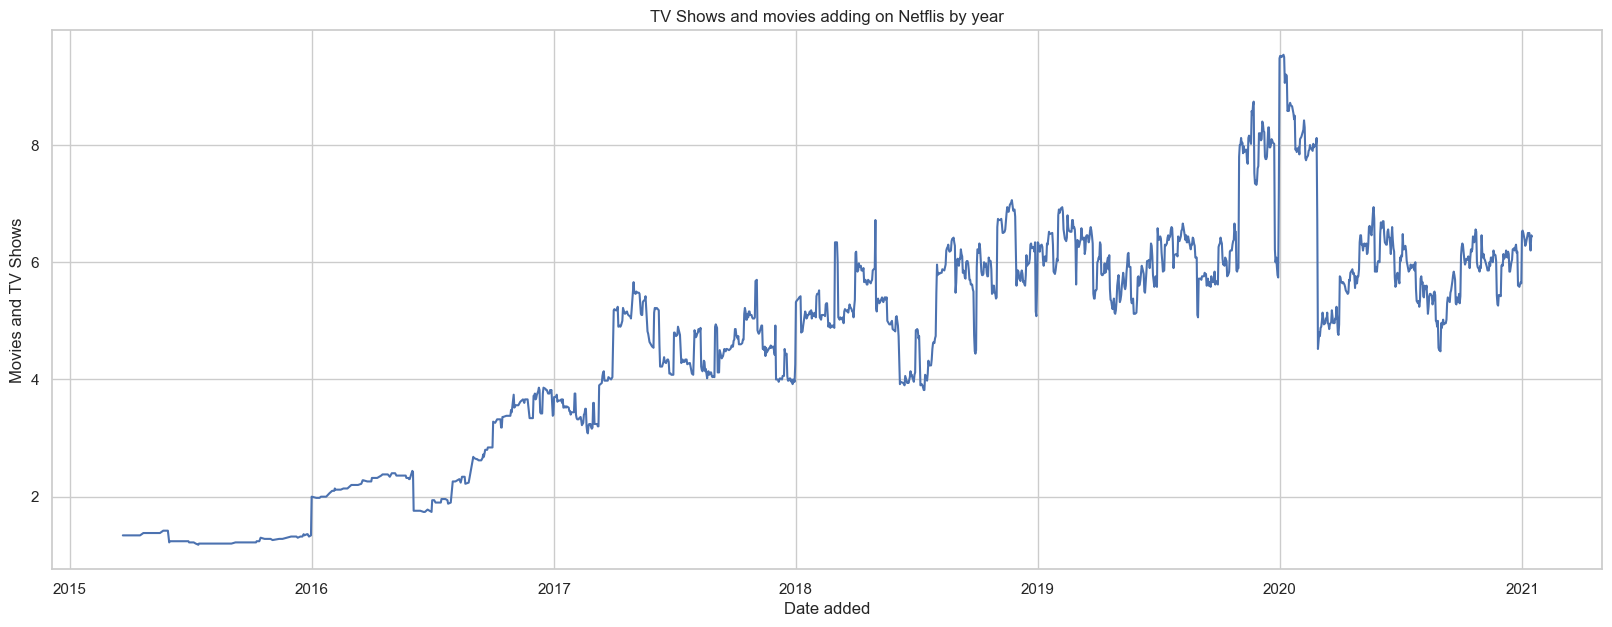

In [367]:
sns.lineplot(data=movies_by_adding, x='date_added', y='rolling');
plt.title('TV Shows and movies adding on Netflis by year');
plt.xlabel('Date added');
plt.ylabel('Movies and TV Shows');

*<font size='3'> Netflix established in 1979 and in early 2010 started to become more popular.By 2021 they estimated roughly 209 million global memberships. The graph shows that with platform popularity growth content adding is also increased year by year. The drop in early 2020 may also indicate COVID effect. Netflix team didn't bypassed quarantine as well as others, but got back to the service very soon. </font>*

<font size='1'>     </font>

<font size='3'> Which months movies and TV shows are mostly added </font>

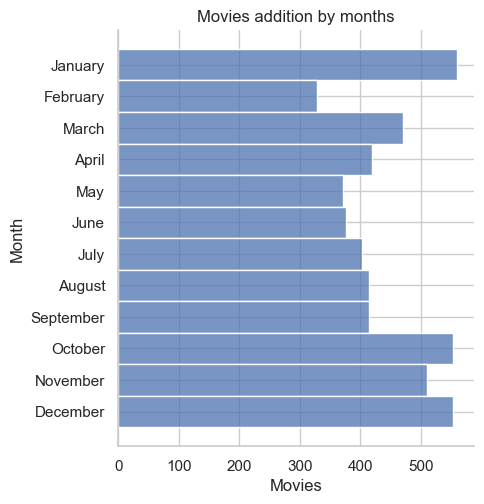

In [369]:
sns.displot(data=netflix.query('type == "Movie"'), y='month');
plt.title('Movies addition by months');
plt.xlabel('Movies');
plt.ylabel('Month');
#plt.xticks(rotation=90);

*<font size='3'> Movies are mostly added to the platform from October to January. This corelates with American holidays that happening in this period. </font>*

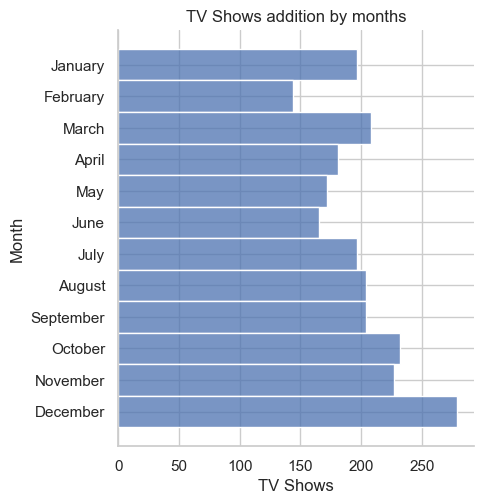

In [370]:
sns.displot(data=netflix.query('type == "TV Show"'), y='month');
plt.title('TV Shows addition by months');
plt.xlabel('TV Shows');
plt.ylabel('Month');

*<font size='3'> TV Shows are mostly added to the platform in December. </font>*

<font size='1'>     </font>

<font size='3'> Top 10 countries by producing movies and TV Shows </font>

In [274]:
netflix.country.value_counts().head(10)

United States     2555
India              923
Missing            507
United Kingdom     397
Japan              226
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Name: country, dtype: int64

<font size='3'> Popular ratings overall </font>

In [243]:
netflix.rating.value_counts()

TV-MA       2868
TV-14       1933
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

<font size='3'> Popular movie ratings </font>

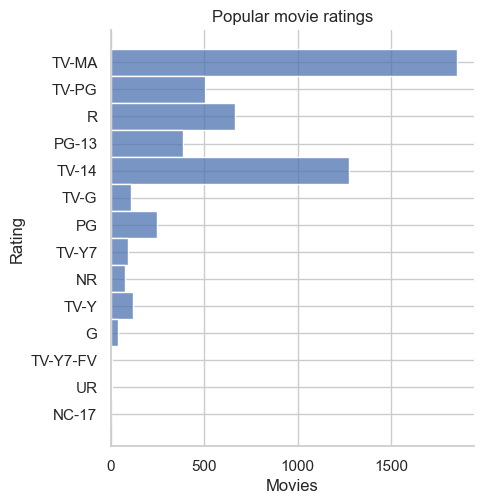

In [251]:
sns.displot(data=netflix.query('type == "Movie"'), y='rating');
plt.title('Popular movie ratings');
plt.xlabel('Movies');
plt.ylabel('Rating');

<font size='3'> Popular TV shows ratings </font>

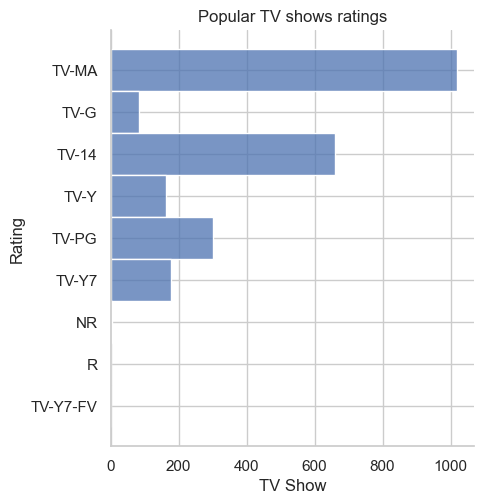

In [250]:
sns.displot(data=netflix.query('type == "TV Show"'), y='rating');
plt.title('Popular TV shows ratings');
plt.xlabel('TV Show');
plt.ylabel('Rating');

<font size='1'>     </font>

<font size='3'> On which day mostly movies and TV shows are added to the platform </font>

In [248]:
netflix.day.value_counts()

Friday       2297
Thursday     1147
Tuesday      1070
Wednesday    1020
Monday        814
Saturday      731
Sunday        708
Name: day, dtype: int64

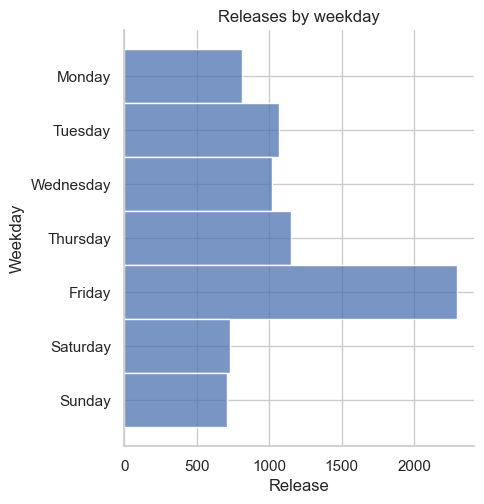

In [249]:
sns.displot(data=netflix, y='day');
plt.title('Releases by weekday');
plt.xlabel('Release');
plt.ylabel('Weekday');

*<font size='3'> Movies and TV shows are mostly added to Netflix on friday. Which is the end day of workweek in most countries. </font>*

<font size='1'>     </font>

<font size='3'> Dynamic of movies and TV shows adding to the Netflix within 1 year of their release </font>

In [183]:
# Adding column with delta between date of release and date of adding to the platform
netflix['delta_release_vs_adding'] = netflix.date_added.dt.year - netflix.release_year

In [372]:
temp = netflix.query('delta_release_vs_adding <= 1').groupby('date_added', as_index=False).agg({'rating': 'count'})

In [373]:
temp

,date_added,rating
0,2008-02-04,1
1,2009-11-18,1
2,2011-05-17,1
3,2012-02-21,1
4,2012-11-14,1
...,...,...
1347,2021-01-12,2
1348,2021-01-13,1
1349,2021-01-14,1
1350,2021-01-15,10


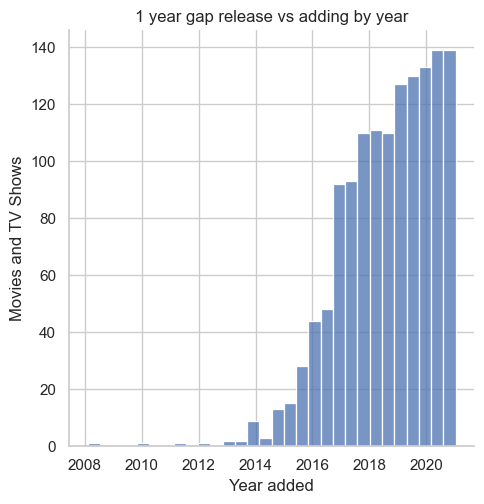

In [374]:
sns.displot(data=temp, x='date_added');
plt.title('1 year gap release vs adding by year');
plt.xlabel('Year added');
plt.ylabel('Movies and TV Shows');

*<font size='3'> Popularity of the Netflix and movie industry growth, motivates film makers to add movies to streaming platfroms right after release of the content. Thus this is the good way to attract more audience both for movie makers and for the platform to increase members. It is also became more popular with COVID quarantine, since movie theaters were closed. </font>*

<font size='1'>     </font>

<font size='3'> How many romantic genre movies and TV Shows have been added by months </font>

In [302]:
# Adding new column to netflix dataframe, that shows 1 - if genre contains Romantic and 0 - if not
netflix['is_romantic'] = netflix.genres.str.find('Romantic').apply(lambda x: 1 if (x>0) else 0)

In [354]:
romantic_content = netflix \
    .query('is_romantic == 1') \
    .groupby('month', as_index=False) \
    .agg({'rating': 'count'}) \
    .rename(columns={'rating': 'romantic_genre'}) \
    .sort_values('romantic_genre', ascending=False).reset_index(drop=True)

In [355]:
romantic_content

,month,romantic_genre
0,December,106
1,October,95
2,November,86
3,March,72
4,April,70
5,January,62
6,June,61
7,July,61
8,August,59
9,May,57


*<font size='3'> Most popular months with romantic genre content adding are December, October, November. Whis is correlating with holidays months in US. </font>*

### Insights

* Data was prepared for further analysis. NaN replaced, data types matching.
* 3 columns were added with year of adding, month name and weekday.
* Most popular type of content is movie.
* Movie and TV shows releases started to actively increase by 2000.
* Content adding to the Netflix is rapidely growing
* Most popular months of adding movies are October-January. For TV shows December.
* US and India released most of the movies.
* Popular ratings are TV-MA and TV-14.
* Most of the content is added on Friday.
* From 2016 more and more movies and TV shows are added with gap between release and adding less than 1 year.